In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [3]:
from pathlib import Path
from matplotlib import pyplot as plt

In [4]:
from diffusers import StableDiffusionPipeline, UNet2DConditionModel


In [5]:
import diffusers
diffusers.__version__ 

'0.32.2'

In [6]:
from omegaconf import OmegaConf
from txt2img import load_model_from_config

/home/nadavg/anaconda3/envs/qdiff/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [7]:
config = OmegaConf.load(f'{Path.home()}/q-diffusion/configs/stable-diffusion/v1-inference.yaml')
model = load_model_from_config(config, "/fastdata/users/nadavg/sd/qdiff/sd-v1-4.ckpt")

/home/nadavg/q-diffusion/scripts/txt2img.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pl_sd = torch.load(ckpt, map_location="cpu")


LatentDiffusion: Running in eps-prediction mode


In [8]:
unet1_4 = model.model.diffusion_model

In [9]:
pipe = StableDiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V4.0_noVAE")
#unet = pipe.net

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
unet = pipe.unet

In [27]:
from src.utils.torch_utils import add_full_name_to_module
from torch import nn


In [28]:
add_full_name_to_module(unet)
add_full_name_to_module(unet1_4)

In [29]:
for module in unet1_4.modules():
    if isinstance(module, (nn.Linear ,  nn.Conv2d , nn.ConvTranspose2d , nn.BatchNorm2d)):
        print(type(module), module.full_name)

<class 'torch.nn.modules.linear.Linear'> time_embed.0
<class 'torch.nn.modules.linear.Linear'> time_embed.2
<class 'torch.nn.modules.conv.Conv2d'> input_blocks.0.0
<class 'torch.nn.modules.conv.Conv2d'> input_blocks.1.0.in_layers.2
<class 'torch.nn.modules.linear.Linear'> input_blocks.1.0.emb_layers.1
<class 'torch.nn.modules.conv.Conv2d'> input_blocks.1.0.out_layers.3
<class 'torch.nn.modules.conv.Conv2d'> input_blocks.1.1.proj_in
<class 'torch.nn.modules.linear.Linear'> input_blocks.1.1.transformer_blocks.0.attn1.to_q
<class 'torch.nn.modules.linear.Linear'> input_blocks.1.1.transformer_blocks.0.attn1.to_k
<class 'torch.nn.modules.linear.Linear'> input_blocks.1.1.transformer_blocks.0.attn1.to_v
<class 'torch.nn.modules.linear.Linear'> input_blocks.1.1.transformer_blocks.0.attn1.to_out.0
<class 'torch.nn.modules.linear.Linear'> input_blocks.1.1.transformer_blocks.0.ff.net.0.proj
<class 'torch.nn.modules.linear.Linear'> input_blocks.1.1.transformer_blocks.0.ff.net.2
<class 'torch.nn.mo

In [30]:
for module in unet.modules():
    if isinstance(module, (nn.Linear ,  nn.Conv2d , nn.ConvTranspose2d , nn.BatchNorm2d)):
        print(type(module), module.full_name)

<class 'torch.nn.modules.conv.Conv2d'> conv_in
<class 'torch.nn.modules.linear.Linear'> time_embedding.linear_1
<class 'torch.nn.modules.linear.Linear'> time_embedding.linear_2
<class 'torch.nn.modules.conv.Conv2d'> down_blocks.0.attentions.0.proj_in
<class 'torch.nn.modules.linear.Linear'> down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q
<class 'torch.nn.modules.linear.Linear'> down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k
<class 'torch.nn.modules.linear.Linear'> down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v
<class 'torch.nn.modules.linear.Linear'> down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0
<class 'torch.nn.modules.linear.Linear'> down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q
<class 'torch.nn.modules.linear.Linear'> down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k
<class 'torch.nn.modules.linear.Linear'> down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v
<class 'torch.nn.modules.linear.Linear'> down

In [13]:
unet.config.keys()


odict_keys(['sample_size', 'in_channels', 'out_channels', 'center_input_sample', 'flip_sin_to_cos', 'freq_shift', 'down_block_types', 'mid_block_type', 'up_block_types', 'only_cross_attention', 'block_out_channels', 'layers_per_block', 'downsample_padding', 'mid_block_scale_factor', 'dropout', 'act_fn', 'norm_num_groups', 'norm_eps', 'cross_attention_dim', 'transformer_layers_per_block', 'reverse_transformer_layers_per_block', 'encoder_hid_dim', 'encoder_hid_dim_type', 'attention_head_dim', 'num_attention_heads', 'dual_cross_attention', 'use_linear_projection', 'class_embed_type', 'addition_embed_type', 'addition_time_embed_dim', 'num_class_embeds', 'upcast_attention', 'resnet_time_scale_shift', 'resnet_skip_time_act', 'resnet_out_scale_factor', 'time_embedding_type', 'time_embedding_dim', 'time_embedding_act_fn', 'timestep_post_act', 'time_cond_proj_dim', 'conv_in_kernel', 'conv_out_kernel', 'projection_class_embeddings_input_dim', 'attention_type', 'class_embeddings_concat', 'mid_blo

In [16]:
unet1_4.config = unet.config
pipe.unet = unet1_4


In [17]:
_=pipe.to("cuda")

In [18]:
import torch
torch.cuda.is_available()

True

In [23]:
type(pipe.unet)

ldm.modules.diffusionmodules.openaimodel.UNetModel

In [19]:
pipe._execution_device

device(type='cuda', index=0)

In [24]:
I = pipe("a puppy wearing a hat",num_inference_steps=20).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True
hf=True


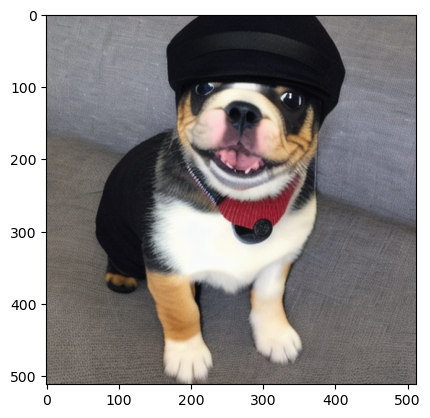

In [25]:
plt.imshow(I)

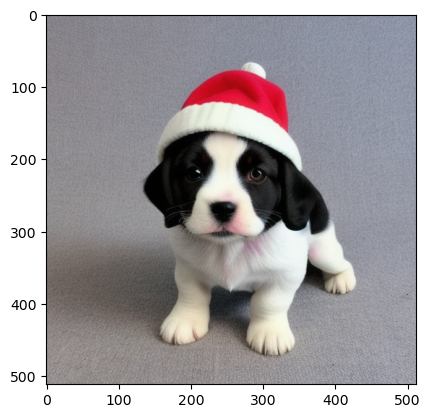

In [ ]:
plt.imshow(I)